# Homework 5
### 20180594 이정훈

### Module Import

In [1]:
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

In [3]:
df.head()

Date
2021-01-04    2944.45
2021-01-05    2990.57
2021-01-06    2968.21
2021-01-07    3031.68
2021-01-08    3152.18
Name: Close, dtype: float64

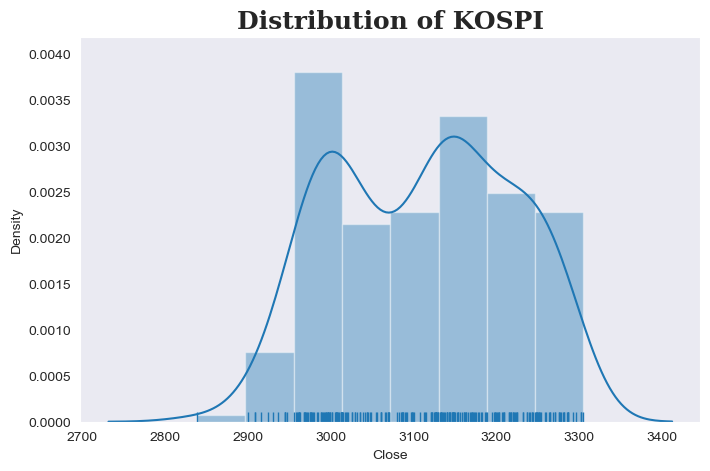

In [4]:
import seaborn as sns
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(df, kde = True, rug = True)
plt.title('Distribution of KOSPI', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

In [5]:
Idx = pd.DataFrame([np.log(df).diff(1), np.log(df)], index = ['log_return_Index', 'log_index']).T.dropna()
Idx.head()

,log_return_Index,log_index
Date,,
2021-01-05,0.015542,8.003219
2021-01-06,-0.007505,7.995714
2021-01-07,0.021158,8.016872
2021-01-08,0.038977,8.055850
2021-01-11,-0.001184,8.054666


## Problem

<br>
<span style="font-size:120%">
    Find an appropriate GARCH model for the KOSPI index returns during the period 2021:01:02-2021:12:30 (on the basis of daily, closing prices). <br> <br>
    Examine whether the coefficient estimates are significant at the conventional significance levels.

<span style="font-size:120%">
    
First, We neet to plot the return rate of $\mathbf{KOSPI}$

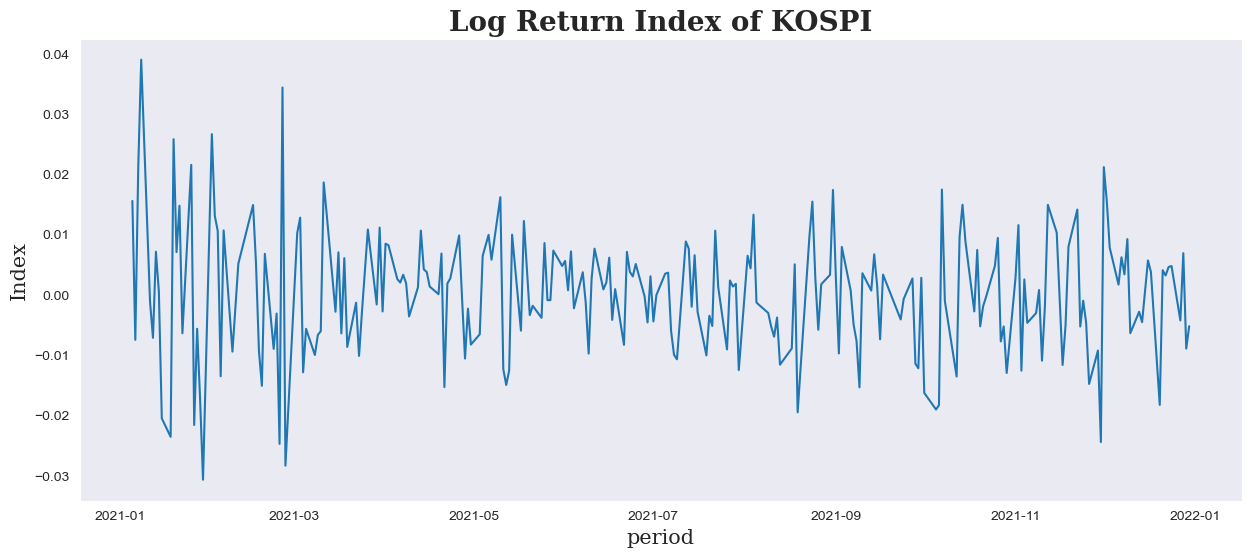

In [6]:
sns.set_style("dark")
plt.figure(figsize = (15,6))
plt.title('Log Return Index of KOSPI', fontsize = 20, fontweight='bold', fontfamily='Serif')
plt.xlabel('period', fontsize = 15, fontfamily='Serif')
plt.ylabel('Index', fontsize = 15, fontfamily='Serif')
plt.plot(Idx.log_return_Index)
plt.show()

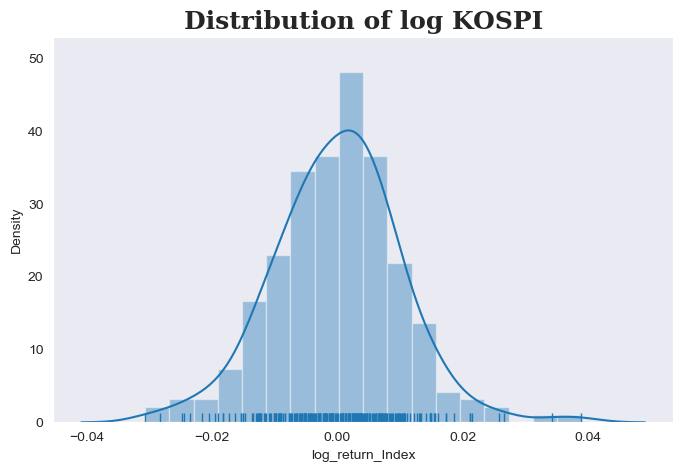

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(Idx.log_return_Index, kde = True, rug = True)
plt.title('Distribution of log KOSPI', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

In [8]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x800 with 0 Axes>

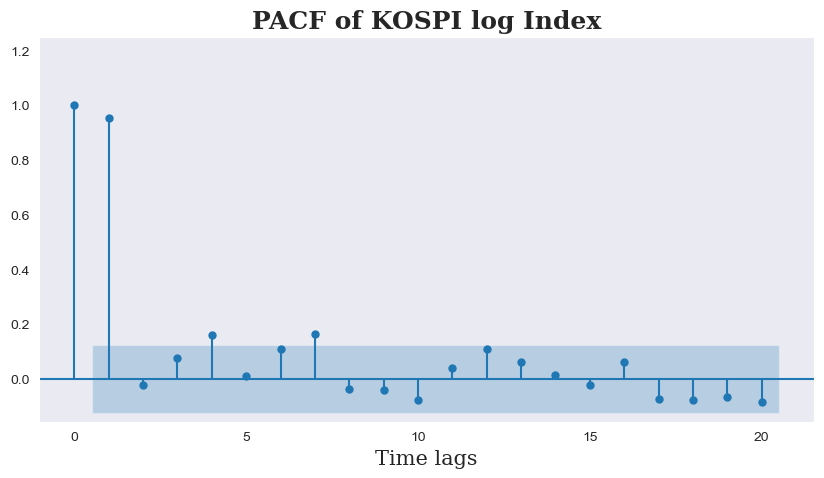

In [9]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(Idx['log_index'], auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 15, fontfamily='Serif')
plt.title('PACF of KOSPI log Index', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

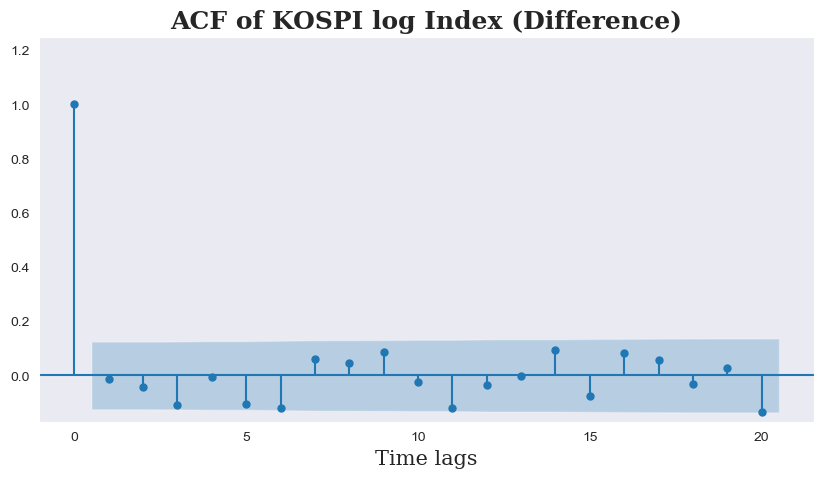

In [10]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Idx['log_return_Index'], auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15, fontfamily='Serif')
plt.title('ACF of KOSPI log Index (Difference)', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

<span style="font-size:120%">

Consider the model as $\mathbf{ARIMA(7,0,0)}$

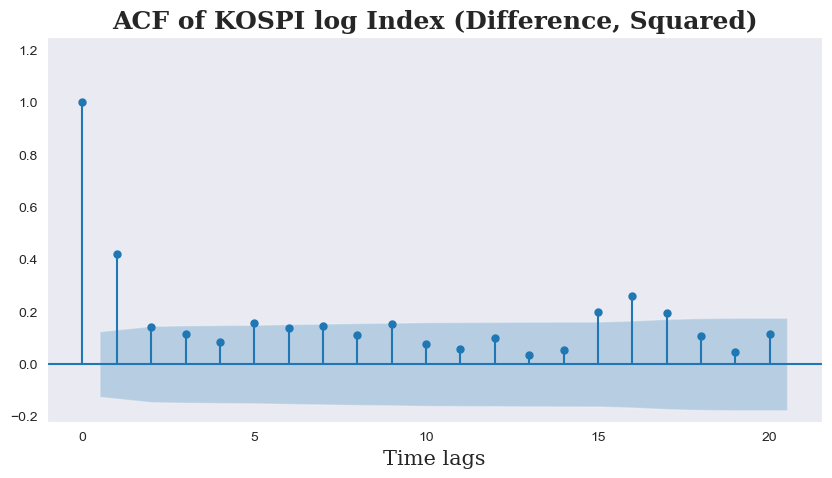

In [11]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Idx['log_return_Index']**2, auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15, fontfamily='Serif')
plt.title('ACF of KOSPI log Index (Difference, Squared)', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

In [12]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(Idx['log_index'], order = (7,0,0), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              log_index   No. Observations:                  247
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 791.218
Date:                Sat, 18 Feb 2023   AIC                          -1564.437
Time:                        01:55:57   BIC                          -1532.852
Sample:                             0   HQIC                         -1551.721
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0324      0.021    380.092      0.000       7.991       8.074
ar.L1          0.9496      0.045     21.083      0.000       0.861       1.038
ar.L2         -0.0488      0.074     -0.662      0.508      -0.193       0.096
ar.L3         -0.0981      0.084     -1.165      0.244      -0.263       0.067
ar.L4          0.1464      0.075      1.951      0.051      -0.001       0.293
ar.L5         -0.1023      0.075     -1.364      0.173      -0.249       0.045
ar.L6         -0.0397      0.085     -0.467      0.641      -0.207       0.127
ar.L7          0.1655      0.061      2.704      0.007       0.046       0.285
sigma2      9.555e-05   7.22e-06     13.231      0.000    8.14e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.82
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.27
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
noise = model.resid

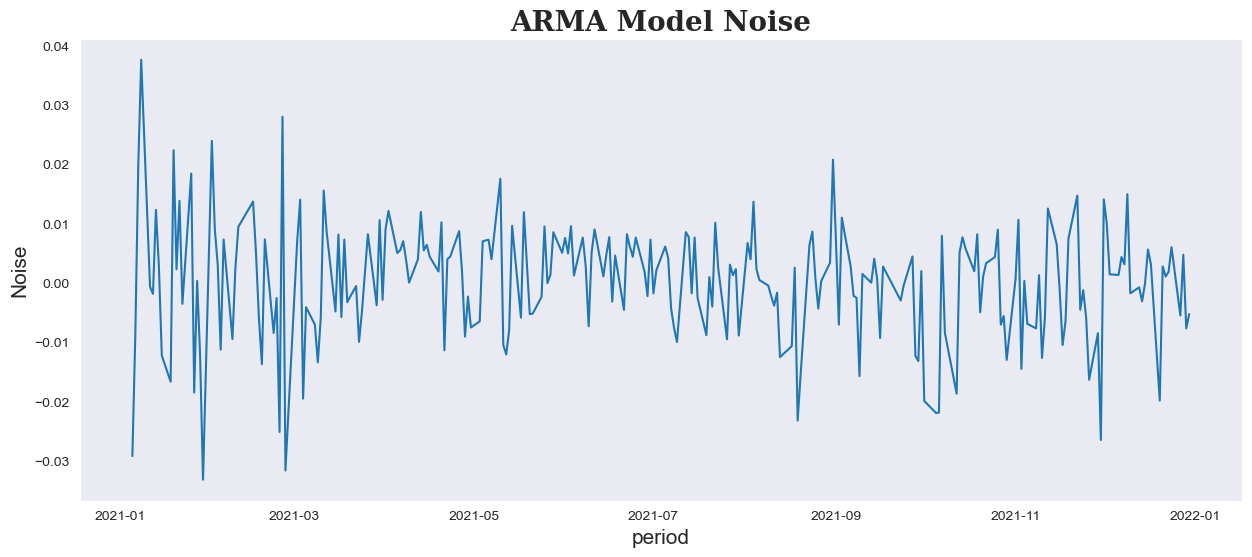

In [14]:
sns.set_style("dark")
plt.figure(figsize = (15,6))
plt.title('ARMA Model Noise', fontsize = 20, fontweight='bold', fontfamily='Serif')
plt.xlabel('period', fontsize = 15)
plt.ylabel('Noise', fontsize = 15)
plt.plot(noise)
plt.show()

In [15]:
import arch
GARCH = arch.arch_model(noise, vol = 'garch', p = 1, q = 1).fit()
GARCH.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11849163358.682306
Iteration:      2,   Func. Count:     18,   Neg. LLF: 787932546.3497158
Iteration:      3,   Func. Count:     30,   Neg. LLF: 831725.7889292199
Iteration:      4,   Func. Count:     39,   Neg. LLF: 3135.7558880902207
Iteration:      5,   Func. Count:     49,   Neg. LLF: -457.05692521969195
Iteration:      6,   Func. Count:     58,   Neg. LLF: 8583.7200306704
Iteration:      7,   Func. Count:     67,   Neg. LLF: -779.2386169662816
Iteration:      8,   Func. Count:     74,   Neg. LLF: 236168.51087101252
Iteration:      9,   Func. Count:     80,   Neg. LLF: -801.4791117296387
Iteration:     10,   Func. Count:     86,   Neg. LLF: -789.9766630646203
Iteration:     11,   Func. Count:     92,   Neg. LLF: -806.3151621184259
Iteration:     12,   Func. Count:     98,   Neg. LLF: -806.6544556332506
Iteration:     13,   Func. Count:    104,   Neg. LLF: -806.7678371809068
Iteration:     14,   Func. Count:    109,   Neg. LLF: -

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                806.772
Distribution:                  Normal   AIC:                          -1605.54
Method:            Maximum Likelihood   BIC:                          -1591.51
                                        No. Observations:                  247
Date:                Sat, Feb 18 2023   Df Residuals:                      246
Time:                        01:55:58   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.8629e-04  4.200e-05     16.339  5.204e-60 [6.040e-04,7.686e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.0069e-06  1.961e-10  3.064e+04      0.000 [6.007e-06,6.007e-06]
alpha[1]       0.1140  5.451e-02      2.092  3.646e-02   [7.181e-03,  0.221]
beta[1]        0.8115  4.804e-02     16.894  4.949e-64     [  0.717,  0.906]
============================================================================

Covariance estimator: robust
"""

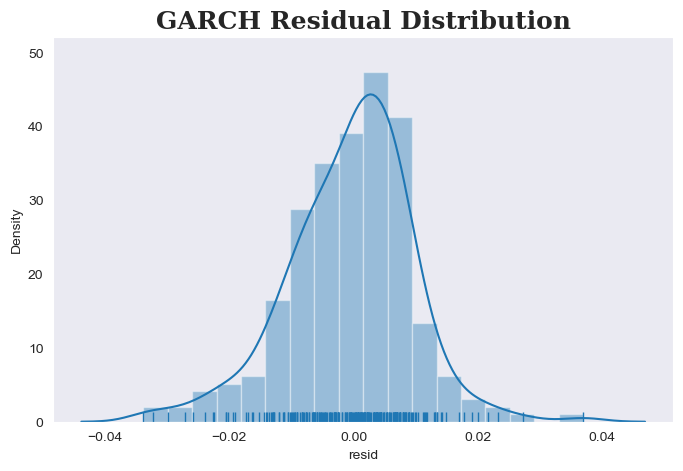

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(GARCH.resid, kde = True, rug = True)
plt.title('GARCH Residual Distribution', fontsize = 18, fontweight='bold', fontfamily='Serif')
plt.show()

<span style="font-size:120%">
    
<center> The Estimated $\mathbf{GARCH(1,1)}$ Model </center>
    
$$\sigma^2_t = 0.00001 + 0.1152a_{t-1}^2 + 0.8101\sigma_{t-1}^2$$
    
The esimated coefficient is significant whose level is 0.05